# **Import the Libraries**

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# **Data Exploration and Understanding**

## **Load the Data**

In [11]:
# !pip install kaggle

In [12]:
# !mkdir ~/.kaggle
# !mv kaggle.json ~/.kaggle/

In [13]:
# !chmod 600 ~/.kaggle/kaggle.json

In [14]:
# !kaggle datasets download -d blastchar/telco-customer-churn

In [15]:
# !unzip telco-customer-churn.zip

In [16]:
# import zipfile

# with zipfile.ZipFile('telco-customer-churn.zip', 'r') as zip_ref:
#     zip_ref.extractall('destination_folder')

In [17]:
# import pandas as pd

# # Load the dataset into a DataFrame
# df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# df.head()

In [18]:
# Read the CSV file "Telco-Customer-Churn.csv" into a Pandas DataFrame and assign it to the variable 'df'
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [19]:
# Display the first five rows of the DataFrame 'df' to inspect the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Understand Data Structure and Characteristics**

### ***Dataset Shape***

In [20]:
# Get the number of rows and columns in the DataFrame 'df'
shape_of_df = df.shape
print(f"Instances: {shape_of_df[0]}\nFeatures: {shape_of_df[1]}")

Instances: 7043
Features: 21


### ***Dataset Type***

In [21]:
# Display the data types of each column in the DataFrame 'df'
data_types_of_df = df.dtypes
print(data_types_of_df)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


**Analysis:**

* The dataset appears to contain a mix of categorical and numerical features.
* The data types seem appropriate for most columns, but there might be an issue with the TotalCharges column, which should ideally be a numerical type.

* We weill do further exploration to understand and handle any missing values or inconsistencies in the data.

* Depending on our analysis goals, encoding categorical variables and converting TotalCharges to a numerical type is necessary.

### ***Numerical vs Categorical Features***

In [22]:
# Extracting Numerical Features from the DataFrame 'df' and displaying their column names
numerical_features = df.select_dtypes(include=[np.number])
print(numerical_features.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [23]:
# Extracting Categorical Features from the DataFrame 'df' and displaying their column names
categorical_features = df.select_dtypes(include=[object])
print(categorical_features.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


### ***Descriptive Statistics***

In [24]:
# Generate descriptive statistics for the DataFrame 'df'
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**1. Count:**
* The count row shows the number of non-null values for each numerical column.
* All three columns (SeniorCitizen, tenure, and MonthlyCharges) have 7043 non-null values, indicating that there are no missing values in these columns.

**2. Mean:**

* The mean row represents the average value of each numerical column.

* For example, the mean SeniorCitizen value is approximately 0.162, suggesting that, on average, around 16.2% of customers are senior citizens.
* The mean tenure value is approximately 32.37, indicating the average number of months a customer has stayed with the service.
* The mean MonthlyCharges value is approximately 64.76, representing the average monthly charges.

**3. Standard Deviation (std):**

* The std row shows the standard deviation, which is a measure of the amount of variation or dispersion in the data.
* For instance, the standard deviation for SeniorCitizen is approximately 0.369, indicating the degree of variability in the percentage of senior citizens among customers.

**4: Min, 25%, 50%, 75%, Max:**

* These rows represent specific percentiles of the data distribution.
* The minimum (min) value is the smallest value in the dataset.
* The 25th percentile (25% or Q1) is the value below which 25% of the data falls.
* The median (50% or Q2) is the middle value, separating the higher half from the lower half of the dataset.
* The 75th percentile (75% or Q3) is the value below which 75% of the data falls.
* The maximum (max) value is the largest value in the dataset.

**Interpretation:**

* The data indicates that most customers are not senior citizens (as suggested by the low mean and 25th, 50th, and 75th percentiles of SeniorCitizen being 0).
* On average, customers stay for around 32 months, with a considerable range from 0 to 72 months (min to max).
* 75% customers have tenure less than 55 months.
* Monthly charges vary, with an average around \$64.76. The charges range from \$18.25 to \$118.75.

### ***Customer Churn Statistics***

In [25]:
# Calculate churn counts and percentages
churn_counts = df['Churn'].value_counts()
churn_percentages = churn_counts / len(df['Churn']) * 100

# Display churn counts
print(f"Churn counts:\n{churn_counts}")

# Display churn percentages
print(f"\nChurn percentages:\n{churn_percentages.rename('Percentage')}")

# Display total churned customers
print(f"\nTotal churned customers: {churn_counts.sum()}")

Churn counts:
No     5174
Yes    1869
Name: Churn, dtype: int64

Churn percentages:
No     73.463013
Yes    26.536987
Name: Percentage, dtype: float64

Total churned customers: 7043


* The output revels that there are:
5174 customers who did not churn `("No")`

* 1869 customers who churned `("Yes")`

### ***Dataset Summary***

In [26]:
# Display a concise summary of the DataFrame with detailed information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### ***Visualizing Missing Data Percentage***

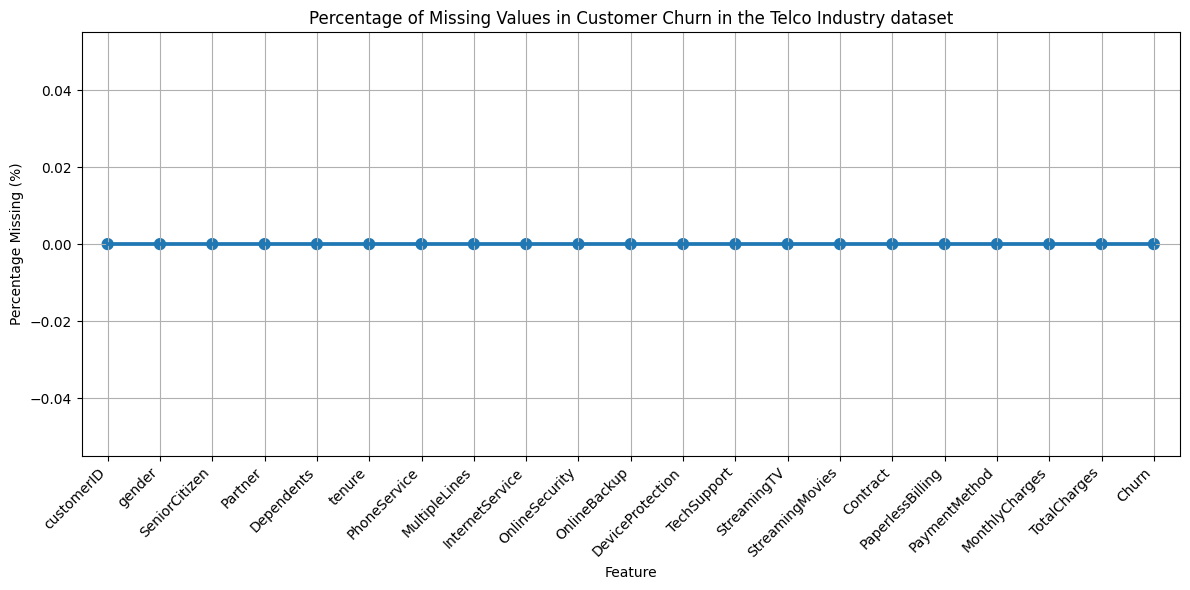

In [27]:
# Calculate missing value percentages
missing_percentages = (df.isnull().sum() * 100) / df.shape[0]

# Create DataFrame for visualization
missing_df = pd.DataFrame({
    "Feature": missing_percentages.index,
    "Percentage Missing": missing_percentages.values
})

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Create point plot with Seaborn
ax = sns.pointplot(x="Feature", y="Percentage Missing", data=missing_df)

# Rotate and style x-axis labels for clarity
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Percentage Missing (%)")

# Customize title and add gridlines
df.name = "Customer Churn in the Telco Industry dataset"
plt.title("Percentage of Missing Values in {}".format(df.name))
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**No missing data: It's great that there are no missing values in this dataset! This simplifies our initial analysis and data cleaning steps.**

*   **For features with fewer missing values:** Consider using regression to predict missing values or filling them with the mean of the available values, depending on the nature of the feature.

*   **For features with a very high number of missing values:** It may be advisable to drop those columns, as they contribute little to the analysis.

*   Deciding whether to delete columns with a high number of missing values is subjective. As a general guideline, columns with more than 30-40% missing values can be considered for deletion. However, it's crucial to make decisions wisely. For instance, consider scenarios like 'Is_Car' and 'Car_Type' where missing values in 'Car_Type' for people with no cars might not render the column useless. Evaluate each case based on its context and impact on analysis.


### ***Detect outliers in numerical columns (e.g., 'tenure' and 'MonthlyCharges')***

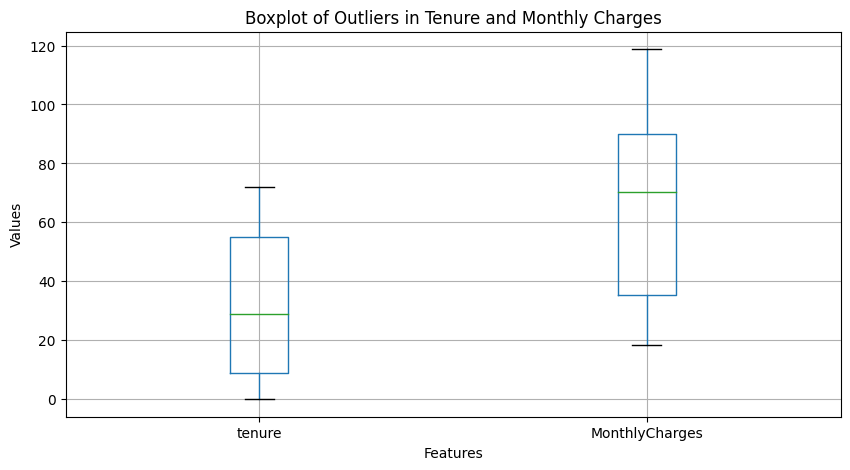

In [29]:
# Specify numerical features of interest
numerical_features = ["tenure", "MonthlyCharges"]

# Extract relevant columns for analysis
numerical_df = df[numerical_features]

# Generate a boxplot to visualize outliers
numerical_df.boxplot(figsize=(10, 5))

# Optionally, add title and labels for clarity
plt.title("Boxplot of Outliers in Tenure and Monthly Charges")
plt.xlabel("Features")
plt.ylabel("Values")

# Display the plot
plt.show()

There are no outliers in the numerical features.

# **Data Cleaning and Preprocessing**

In [30]:
# Create a copy of the base data for manipulation & processing
df = df.copy()

### ***Data Transformation***


***Data Transformation: Convert 'TotalCharges' to Numeric***

***1: Identifying and Displaying Non-Numeric Values in 'TotalCharges'***

In [31]:
# Identify non-numeric values in 'TotalCharges'
non_numeric_values = df['TotalCharges'][~df['TotalCharges'].str.isnumeric()]


# Display the non-numeric values
print("Non-numeric values in 'TotalCharges':")
print(non_numeric_values)

Non-numeric values in 'TotalCharges':
0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 6719, dtype: object


***2: Handling Non-Numeric Values in 'TotalCharges'***

In [32]:
# Convert 'TotalCharges' to numeric, replacing non-numeric values with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute NaN values with the mean of the column
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

**Prepare the 'TotalCharges' column for numerical analysis by ensuring that all values are numeric.**

### ***Feature Engineering***

***Feature Engineering: Create Tenure Groups Based on Customer Tenure***

In [33]:
# Get the max tenure
max_tenure = df['tenure'].max()
print(f"Maximum tenure: {max_tenure}")

# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, bins=range(1, 80, 12), right=False, labels=labels)

# Display the counts for each tenure group
tenure_group_counts = df['tenure_group'].value_counts()
print("\nCounts for each tenure group:")
print(tenure_group_counts)

Maximum tenure: 72

Counts for each tenure group:
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64


**Categorize Customers into Tenure Groups:**
* For customers with tenure less than 12 months, assign a tenure group within the range of 1-12.
* For customers with tenure between 1 to 2 years, assign a tenure group within the range of 13-24.
* The result is a new column 'tenure_group' that represents categorical groups based on customer tenure.


### ***Removing Unnecessary Columns***

In [34]:
# Remove 'customerID' and 'tenure' columns from the DataFrame
df.drop(['customerID', 'tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## ***Handling Categorical Target Variable***

In [35]:
# Convert the target variable 'Churn' to a binary numeric variable: Yes=1, No=0
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


## ***Handling Categorical Variables***

In [36]:
# Convert all categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


# **Exploratory Data Analysis (EDA)| Visualization and Insights**

### ***Visualize the distribution of 'Churn' in the dataset***

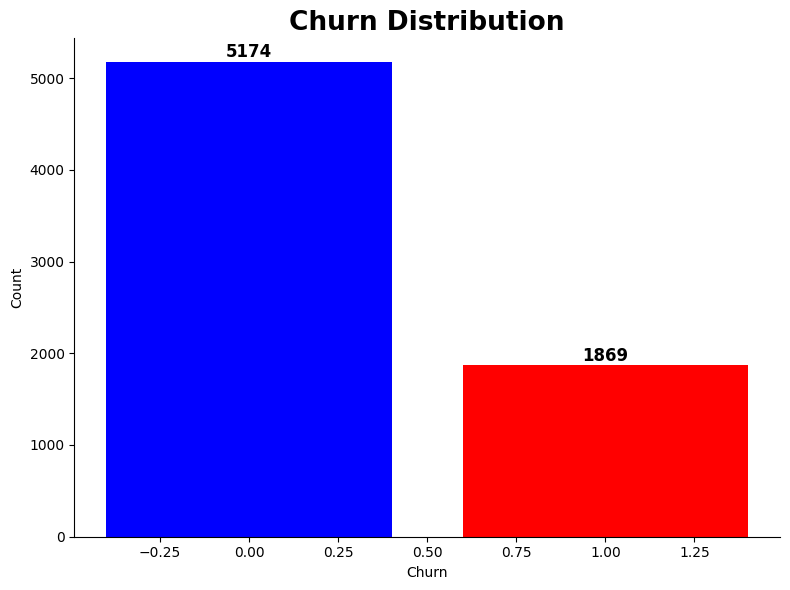

In [37]:
# Get the value counts for 'Churn' column
data_temp = df['Churn'].value_counts().sort_index()

# Create a bar chart with annotations and different colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data_temp.index, data_temp, color=['blue', 'red'])

# Title and axis labels
ax.set_title('Churn Distribution', fontsize=19, fontweight='bold')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')

# Annotate each bar with its count value
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

# Remove spines on top and right sides
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

**The "No" category ("No churn") has significantly more customers (5174) compared to the "Yes" category ("Churn") with 1869 customers. This means the ratio of non-churned to churned customers is roughly 2.8:1.**

### ***Visualize the count of 'Churn' for each 'gender'***

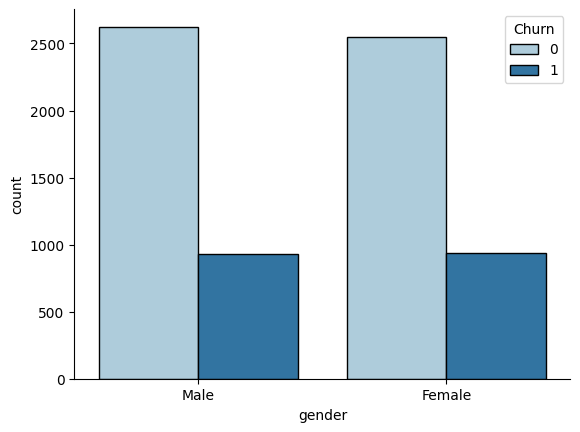

In [38]:
# Visualize the count of 'Churn' for each 'gender' using Seaborn countplot
sns.countplot(x='gender', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['gender'].value_counts().index)
sns.despine()

-----> Yes = 1

-----> No = 0

### ***Visualize the count of 'Churn' for each 'SeniorCitizen'***

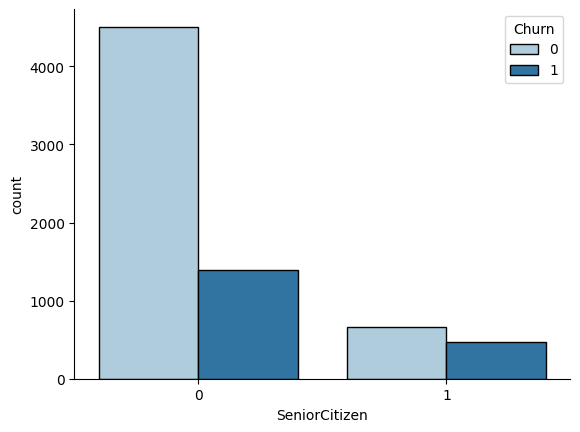

In [39]:
# Visualize the count of 'Churn' for each 'SeniorCitizen' using Seaborn countplot
sns.countplot(x='SeniorCitizen', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['SeniorCitizen'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Partner'***

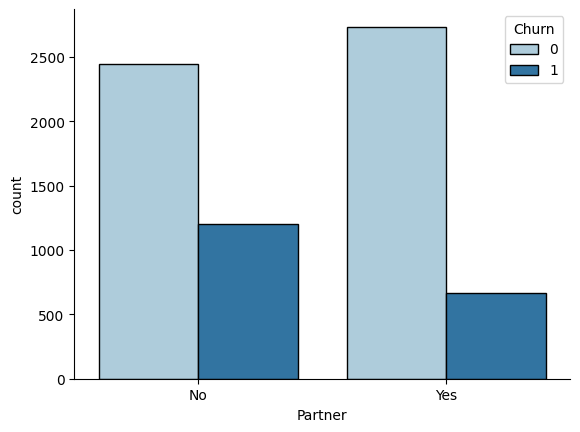

In [40]:
# Visualize the count of 'Churn' for each 'Partner' using Seaborn countplot
sns.countplot(x='Partner', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Partner'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Dependents' category***

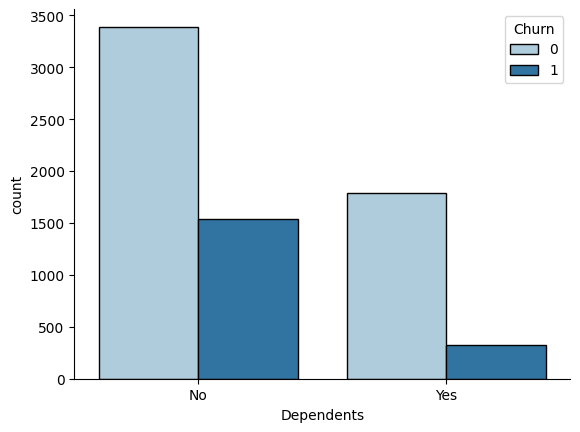

In [41]:
# Visualize the count of 'Churn' for each 'Dependents' category using Seaborn countplot
sns.countplot(x='Dependents', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Dependents'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Payment Method' category***

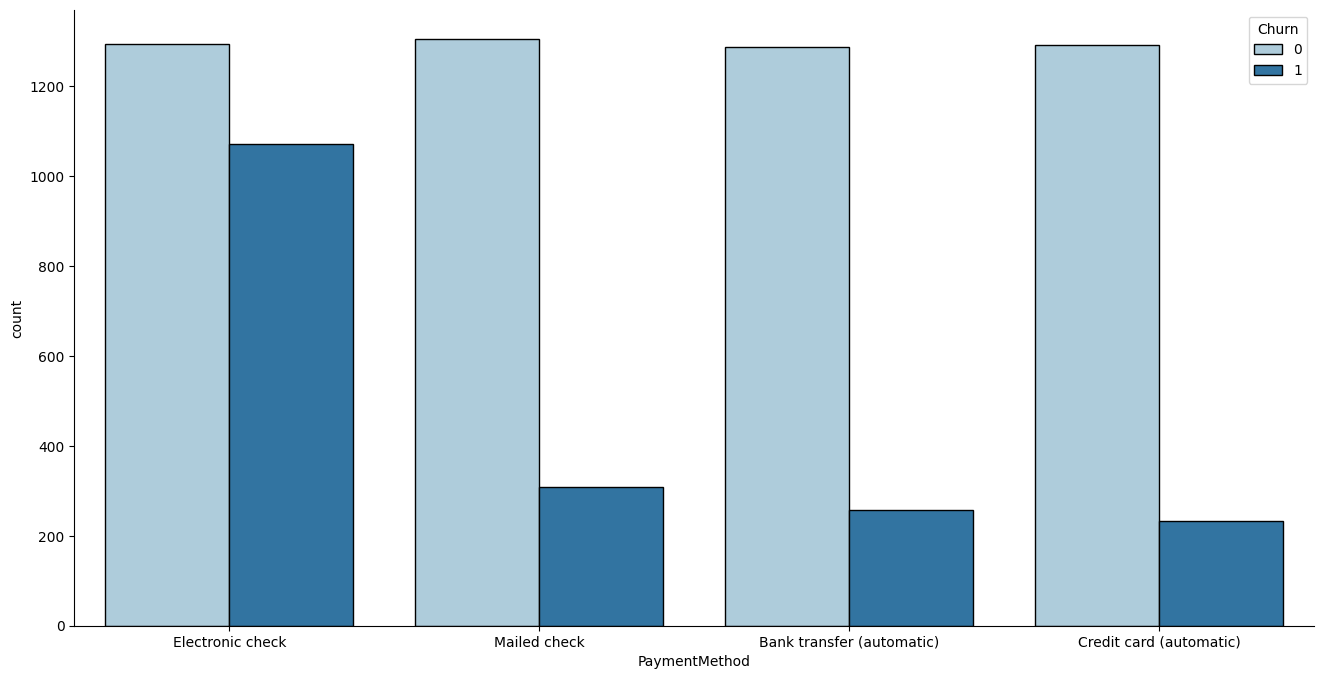

In [42]:
# Visualize the count of 'Churn' for each 'Contract' category using Seaborn countplot
plt.figure(figsize=(16, 8))
sns.countplot(x='PaymentMethod', hue="Churn", data=df, palette="Paired", edgecolor='Black', order=df['PaymentMethod'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'Contract' category***

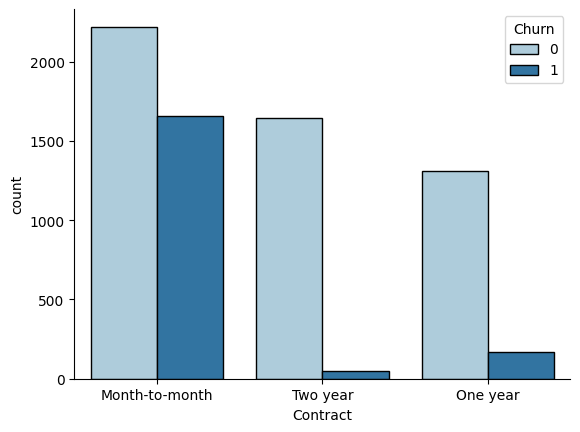

In [43]:
# Visualize the count of 'Churn' for each 'Contract' category using Seaborn countplot
sns.countplot(x='Contract', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Contract'].value_counts().index)
sns.despine()

### ***Visualize the count of 'Churn' for each 'TechSupport' category***

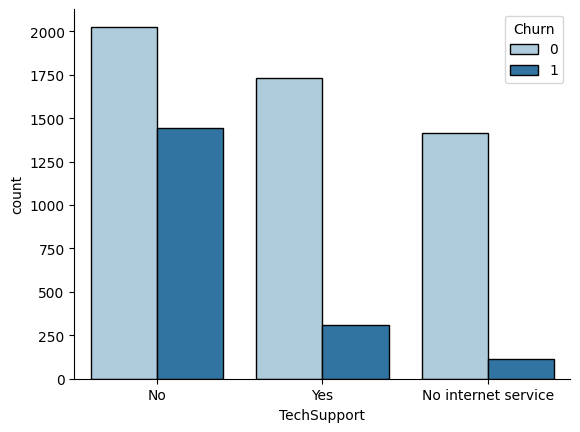

In [44]:
# Visualize the count of 'Churn' for each 'TechSupport' category using Seaborn countplot
sns.countplot(x='TechSupport', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['TechSupport'].value_counts().index)
sns.despine()

**Analysis:**
* Electronic check medium are the highest churners
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* No Online security, No Tech Support category are high churners
* Non senior Citizens are high churners

### ***Visualize the distribution of monthly charges for Churn and Not Churn***

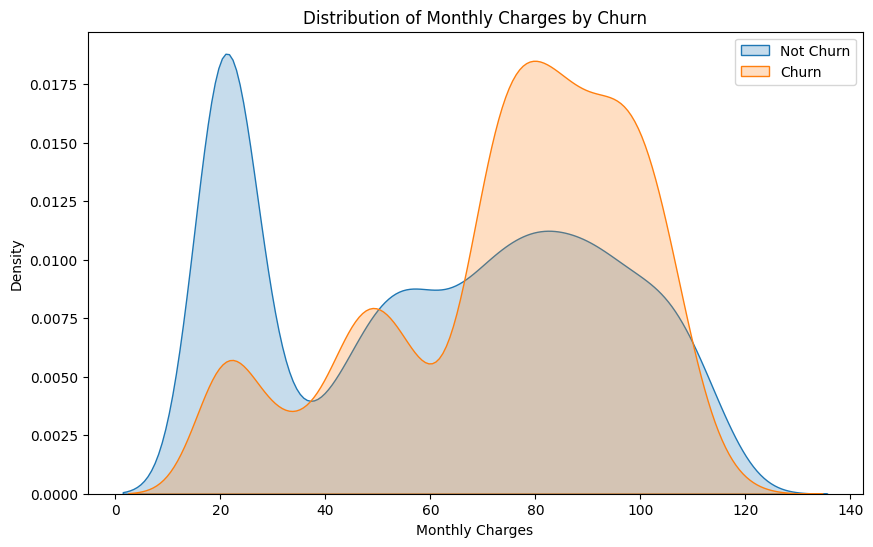

In [45]:
# Visualize the distribution of monthly charges for Churn and Not Churn using Seaborn kdeplot

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a kernel density plot for 'MonthlyCharges' based on Churn status
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 0], fill=True)
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 1], ax=ax, fill=True)

# Add legend for better interpretation
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels and title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

# Display the plot
plt.show()

### ***Visualize the distribution of total charges for Churn and Not Churn***

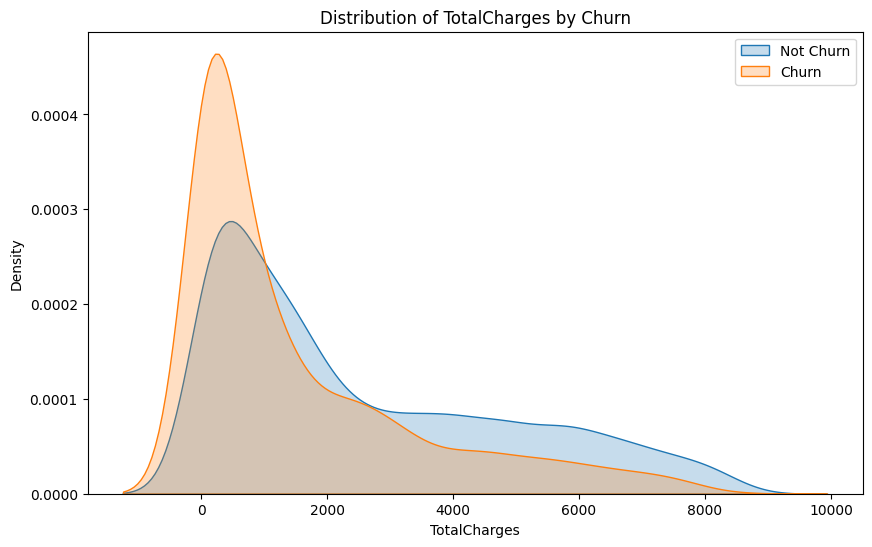

In [46]:
# Visualize the distribution of total charges for Churn and Not Churn using Seaborn kdeplot

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a kernel density plot for 'TotalCharges' based on Churn status
ax = sns.kdeplot(df['TotalCharges'][df['Churn'] == 0], fill=True)
ax = sns.kdeplot(df['TotalCharges'][df['Churn'] == 1], ax=ax, fill=True)

# Add legend for better interpretation
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels and title
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of TotalCharges by Churn')

# Display the plot
plt.show()

### ***Visualize relationship between Monthly Charges and Total Charges***

<Figure size 1000x600 with 0 Axes>

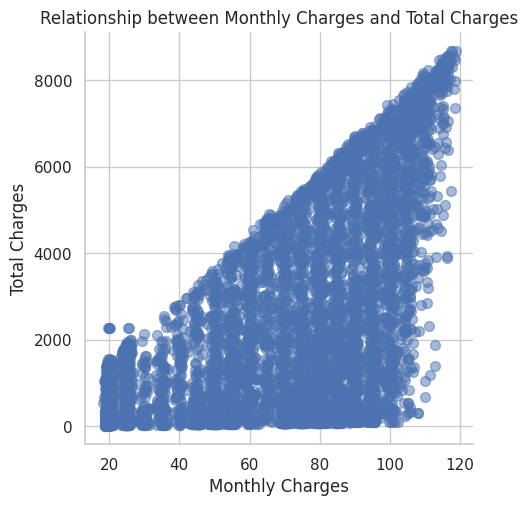

In [47]:
# Set style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(10, 6))

# Create lmplot with custom styling
lmplot = sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False, scatter_kws={'s': 50, 'alpha': 0.5})

# Customize labels and title
lmplot.set_axis_labels("Monthly Charges", "Total Charges")
plt.title("Relationship between Monthly Charges and Total Charges")

# Show the plot
plt.show()

**Total Charges increase as Monthly Charges increases.**

**1. Higher Churn at Lower Total Charges:**

The initial observation highlights a surprising trend where higher churn is associated with lower total charges.

**2. Combined Insights:**

By combining insights from Tenure, Monthly Charges, and Total Charges, a clearer picture emerges.
Higher Monthly Charges at lower tenure results in lower Total Charges.

**3. Link to High Churn:**

The combination of Higher Monthly Charges, Lower tenure, and Lower Total Charges is identified as linked to high churn.

**Interpretation:**

The interplay of these factors suggests that customers with shorter tenures and higher monthly charges may churn before accumulating higher total charges.
This could be indicative of dissatisfaction or a need for optimization in pricing plans or customer onboarding processes.

Understanding these relationships is valuable for devising strategies to reduce churn, potentially by addressing pricing concerns, enhancing the early customer experience, or implementing targeted retention initiatives.

**Build a corelation of all predictors with 'Churn'**

<Axes: >

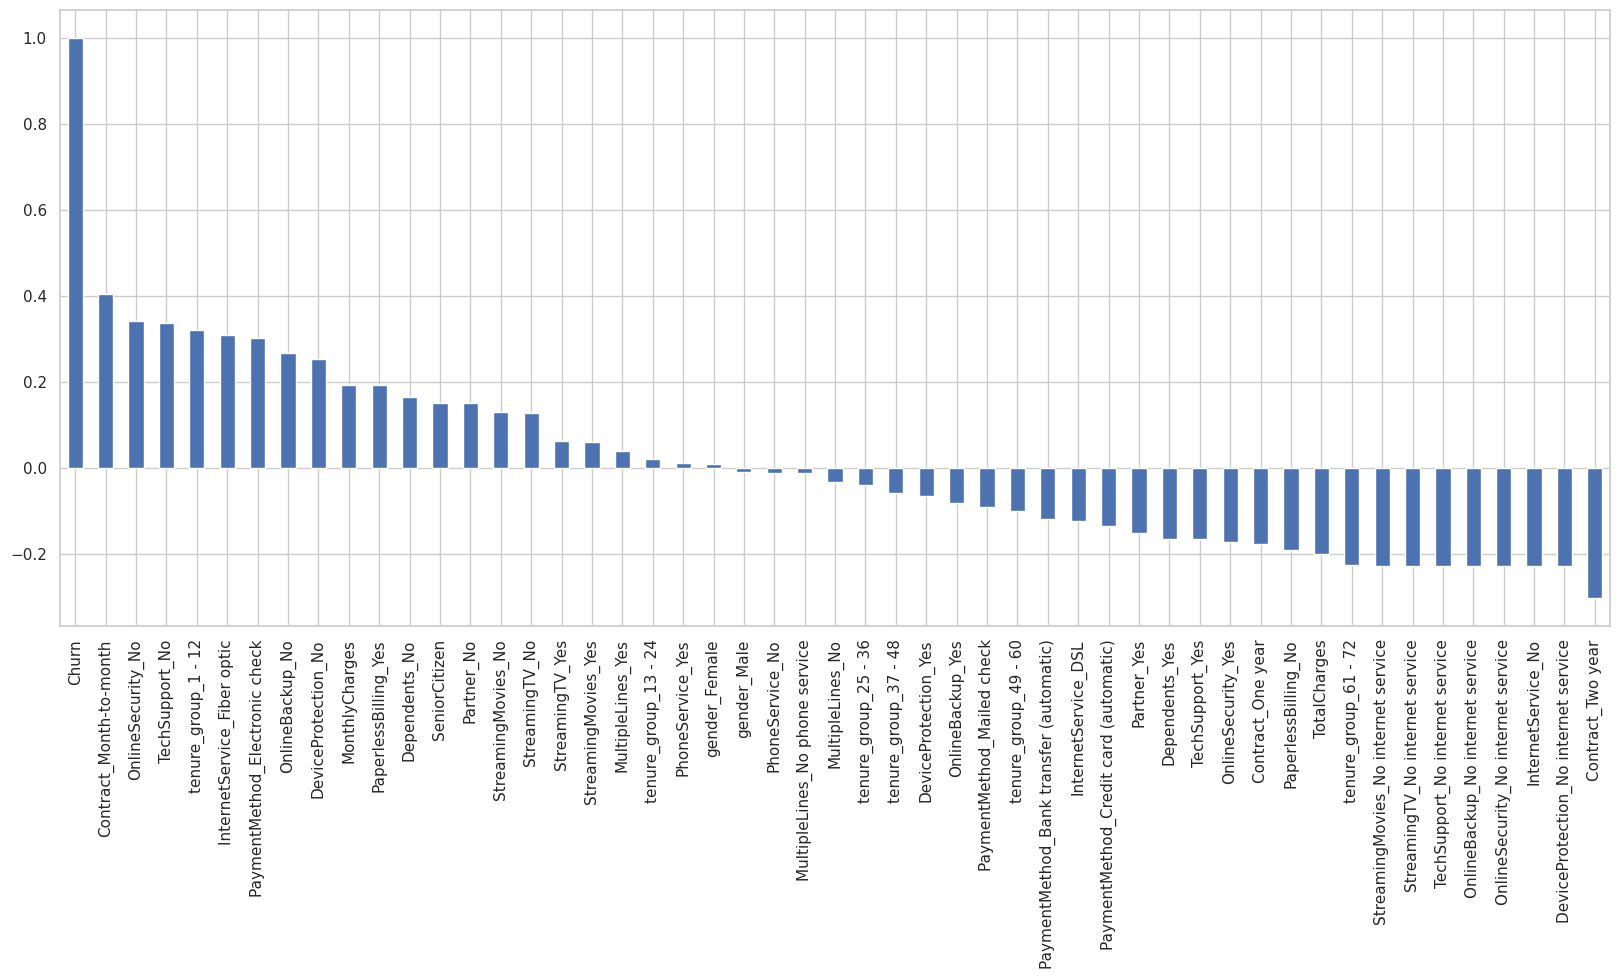

In [48]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**High Churn:**

- **Month-to-Month Contracts:** Customers with month-to-month contracts exhibit high churn rates.
- **No Online Security and No Tech Support:** Customers lacking online security and tech support are more likely to churn.
- **First-Year Subscriptions:** Churn is elevated during the initial year of subscription.
- **Fiber Optics Internet:** Customers with fiber optics internet connections are associated with higher churn.

**Low Churn:**

- **Long-Term Contracts:** Customers with long-term contracts are less likely to churn.
- **Subscriptions without Internet Service:** Customers without internet service subscriptions tend to have lower churn.
- **Engagement for 5+ Years:** Customers engaged for five or more years show lower churn rates.

**Neutral Factors:**

- **Gender:** Gender does not significantly impact churn.
- **Availability of Phone Service:** The presence or absence of phone service has minimal impact on churn.
- **Number of Multiple Lines:** The number of multiple lines does not have a substantial impact on churn.

These insights provide a foundation for devising targeted strategies to reduce churn, such as promoting long-term contracts, improving online security and tech support, and optimizing fiber optics internet services. Additionally, understanding the neutral factors helps in allocating resources effectively.

<Axes: >

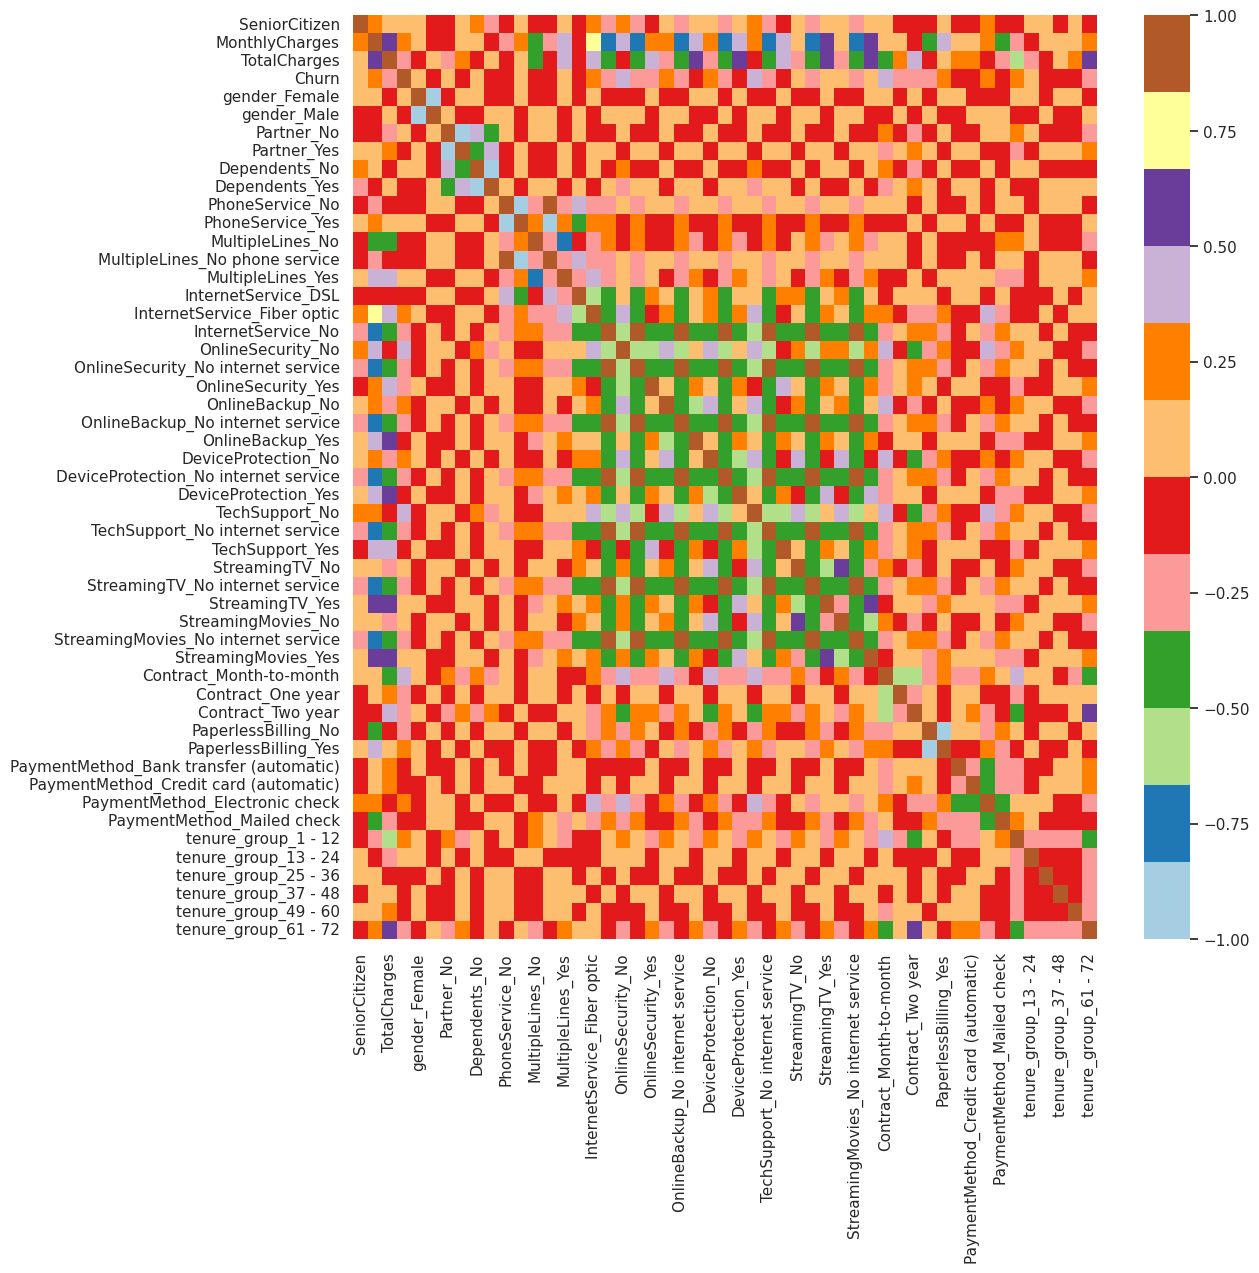

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

In [50]:
# save the DataFrame df_dummies to a CSV file named 'tel_churn.csv'
df_dummies.to_csv('tel_churn.csv')

# **Feature selection**

In [51]:
df = pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [52]:
df = df.drop('Unnamed: 0',axis=1)

In [53]:
# Create a DataFrame X by dropping the 'Churn' column
X = df.drop('Churn', axis=1)

# Display the first few rows of the DataFrame X
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [54]:
# Extract the target variable 'Churn' (Y) from the DataFrame
Y = df['Churn']

# Display the first few rows of the target variable
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# ***Train Test Split***

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [56]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (5634, 50)
X_test shape: (1409, 50)
y_train shape: (5634,)
y_test shape: (1409,)


# **Model Selection and Training**

## ***Model 1: RANDOM FOREST CLASSIFIER***

## ***Model 1: Training***

In [57]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,
                                  criterion='gini',
                                  random_state = 100,
                                  max_depth=6,
                                  min_samples_leaf=8)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

## ***Model 1: Evaluation***

### ***Accuracy Score***

In [58]:
# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy on Random Forest Classifier: {accuracy:.4f}')

Accuracy on Random Forest Classifier: 0.8034


### ***Classification report***

In [59]:
# Generate and display the classification report
class_report = classification_report(Y_test, Y_pred)
print('Classification Report (Random Forest Classifier):\n', class_report)

Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      1033
           1       0.70      0.46      0.56       376

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### ***Confusion matrix***

In [60]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Random Forest Classifier):\n', conf_matrix_df)

Confusion Matrix (Random Forest Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 958               75
Actual Churn                    202              174


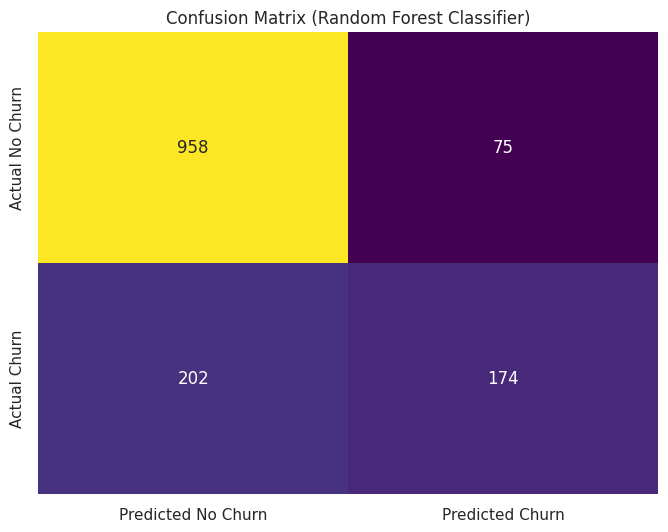

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

## ***Model 2: LOGISTIC REGRESSION***

## ***Model 2: Training***

In [62]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42,
                              max_iter=1000)

# Train the model
lr_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_lr = lr_model.predict(X_test)

## ***Model 2: Evaluation***

### ***Accuracy Score***

In [63]:
# Evaluate accuracy
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f'Accuracy on Logistic Regression: {accuracy_lr:.4f}')

Accuracy on Logistic Regression: 0.8112


### ***Classification report***

In [64]:
# Generate and display the classification report
class_report_lr = classification_report(Y_test, Y_pred_lr)
print('Classification Report (Logistic Regression):\n', class_report_lr)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1033
           1       0.68      0.56      0.61       376

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### ***Confusion matrix***

In [65]:
# Generate and display the confusion matrix
conf_matrix_lr = confusion_matrix(Y_test, Y_pred_lr)
conf_matrix_df_lr = pd.DataFrame(conf_matrix_lr, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Logistic Regression):\n', conf_matrix_df_lr)

Confusion Matrix (Logistic Regression):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 934               99
Actual Churn                    167              209


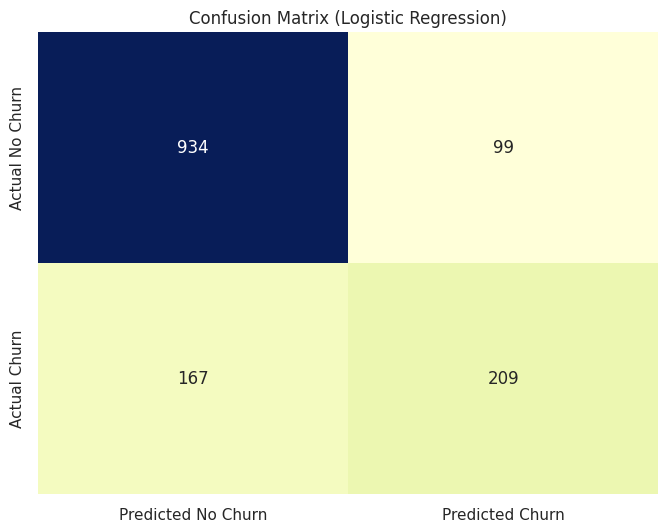

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_lr, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

## ***Model 3: GRADIENT BOOSTING CLASSIFER***

## ***Model 3: Training***

In [67]:
# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_gb = gb_model.predict(X_test)

## ***Model 3: Evaluation***

### ***Accuracy Score***

In [68]:
# Evaluate accuracy
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
print(f'Accuracy on Gradient Boosting Classifier: {accuracy_gb:.4f}')

Accuracy on Gradient Boosting Classifier: 0.8169


### ***Classification report***

In [69]:
# Generate and display the classification report
class_report_gb = classification_report(Y_test, Y_pred_gb)
print('Classification Report (Gradient Boosting Classifier):\n', class_report_gb)

Classification Report (Gradient Boosting Classifier):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.69      0.57      0.62       376

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



### ***Confusion matrix***

In [70]:
# Generate and display the confusion matrix
conf_matrix_gb = confusion_matrix(Y_test, Y_pred_gb)
conf_matrix_df_gb = pd.DataFrame(conf_matrix_gb, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Gradient Boosting Classifier):\n', conf_matrix_df_gb)

Confusion Matrix (Gradient Boosting Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 938               95
Actual Churn                    163              213


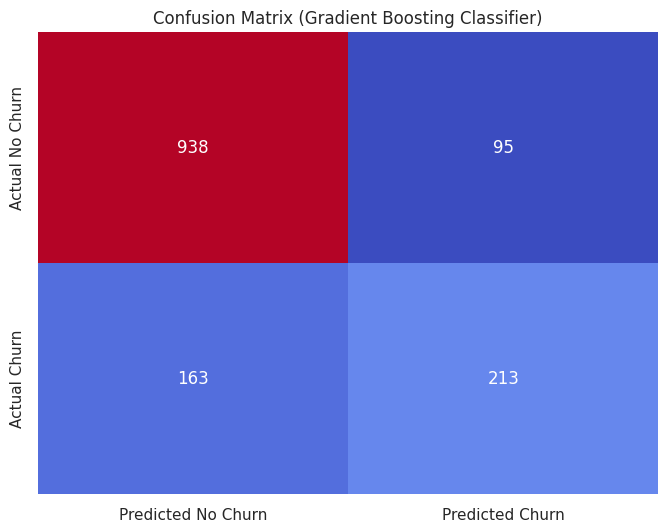

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_gb, annot=True, fmt='d', cmap='coolwarm', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.show()

## ***Model 4: DECISION TREE CLASSIFER***

In [72]:
# Initialize the model
dt_model = DecisionTreeClassifier(criterion="gini",
                                  random_state=100,
                                  max_depth=6,
                                  min_samples_leaf=8)

# Train the model
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dt = dt_model.predict(X_test)

## ***Model 4: Evaluation***

### ***Accuracy Score***

In [73]:
# Evaluate accuracy
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f'Accuracy on Decision Tree Classifier: {accuracy_dt:.4f}')

Accuracy on Decision Tree Classifier: 0.7892


### ***Classification report***

In [74]:
# Classification Report
class_report_dt = classification_report(Y_test, Y_pred_dt)
print('Classification Report (Decision Tree Classifier):\n', class_report_dt)

Classification Report (Decision Tree Classifier):
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       376

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### ***Confusion matrix***

In [75]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)
conf_matrix_df_dt = pd.DataFrame(conf_matrix_dt, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Decision Tree Classifier):\n', conf_matrix_df_dt)

Confusion Matrix (Decision Tree Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 927              106
Actual Churn                    191              185


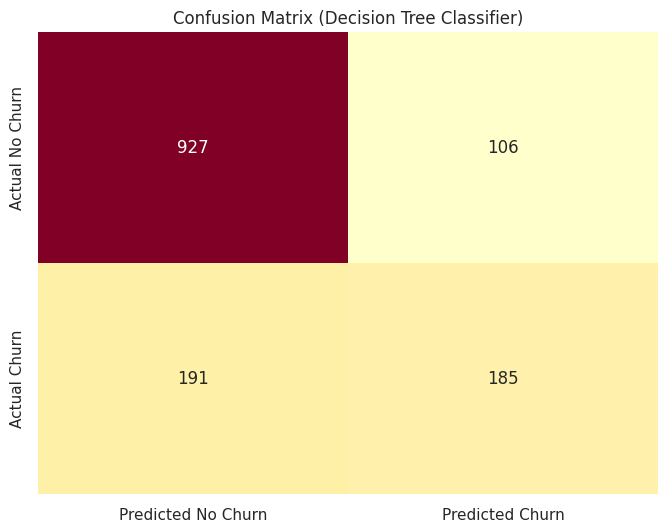

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_dt, annot=True, fmt='d', cmap='YlOrRd', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()

As we noticed the Gradient Boosting Classifier perfroms the best with accuracy of 80%,

But we can see that the accuracy is quite low, and as it's an imbalanced dataset.
Also the recall, precision & f1 score for the minority class is aslo too low (for Class 1, i.e. churned customers.)
Hence, moving ahead to use SMOTEENN (UpSampling + ENN) and then see the results.

# ***SMOTEEN***

**SMOTEEN combines SMOTE (Synthetic Minority Over-sampling Technique) for generating synthetic instances of the minority class with Edited Nearest Neighbors (ENN) for cleaning the dataset. This dual approach effectively addresses class imbalance, enhancing the performance of machine learning models in predicting minority class outcomes.**

In [77]:
# Initialize SMOTEENN
sm = SMOTEENN()

# Apply SMOTEENN to the training data only
X_resampled, y_resampled = sm.fit_resample(X,Y)

In [78]:
# Assuming X_resampled is a pandas DataFrame
feature_column_names = X_resampled.columns.tolist()

# Print or use the feature column names as needed
print("Feature Column Names:", feature_column_names)


Feature Column Names: ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMe

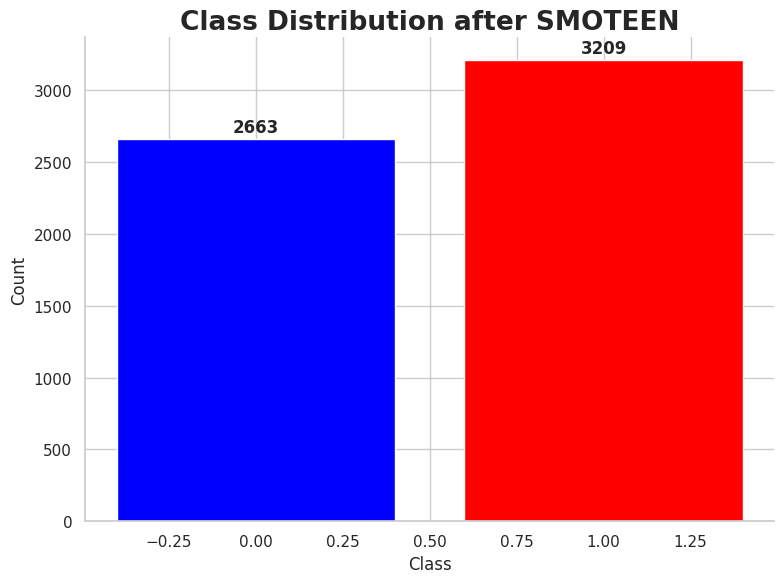

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_resampled and y_resampled are the balanced features and labels

# Combine X_resampled and y_resampled into a single DataFrame for easier plotting
import pandas as pd
df_resampled = pd.DataFrame(X_resampled, columns= feature_column_names)
df_resampled['target'] = y_resampled

# Get the value counts for the target column (assuming binary classification)
data_temp = df_resampled['target'].value_counts().sort_index()

# Create a bar chart with annotations and different colors
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data_temp.index, data_temp, color=['blue', 'red'])

# Title and axis labels
ax.set_title('Class Distribution after SMOTEEN', fontsize=19, fontweight='bold')
ax.set_xlabel('Class')
ax.set_ylabel('Count')

# Annotate each bar with its count value
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

# Remove spines on top and right sides
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

In [80]:
# Calculate churn counts and percentages
churn_counts = df_resampled['target'].value_counts()
churn_percentages = churn_counts / len(df['Churn']) * 100

# Display churn counts
print("Churn counts:")
print(churn_counts)

# Display churn percentages
print("\nChurn percentages:")
print(churn_percentages.rename('Percentage'))

# Display total churned customers
total_churned_customers = churn_counts.sum()
print(f"\nTotal churned customers: {total_churned_customers} out of {len(df)} ({total_churned_customers / len(df) * 100:.2f}%)")


Churn counts:
1    3209
0    2663
Name: target, dtype: int64

Churn percentages:
1    45.562970
0    37.810592
Name: Percentage, dtype: float64

Total churned customers: 5872 out of 7043 (83.37%)


# ***Train Test Split after SMOTEEN***

In [81]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled,test_size=0.2)

# ***LOGISTIC REGRESSION***

## ***Model Training***

In [82]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42,
                              max_iter=1000)

# Train the model
lr_model.fit(xr_train, yr_train)

# Make predictions on the test set
Y_pred_lr = lr_model.predict(xr_test)

## ***Model Evaluation***

### ***Accuracy Score***

In [83]:
# Evaluate accuracy
accuracy_lr = accuracy_score(yr_test, Y_pred_lr)
print(f'Accuracy on Logistic Regression: {accuracy_lr:.4f}')

Accuracy on Logistic Regression: 0.9319


### ***Classification report***

In [84]:
# Generate and display the classification report
class_report_lr = classification_report(yr_test, Y_pred_lr)
print('Classification Report (Logistic Regression):\n', class_report_lr)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       505
           1       0.94      0.94      0.94       670

    accuracy                           0.93      1175
   macro avg       0.93      0.93      0.93      1175
weighted avg       0.93      0.93      0.93      1175



### ***Confusion matrix***

In [85]:
# Generate and display the confusion matrix
conf_matrix_lr = confusion_matrix(yr_test, Y_pred_lr)
conf_matrix_df_lr = pd.DataFrame(conf_matrix_lr, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Logistic Regression):\n', conf_matrix_df_lr)

Confusion Matrix (Logistic Regression):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 467               38
Actual Churn                     42              628


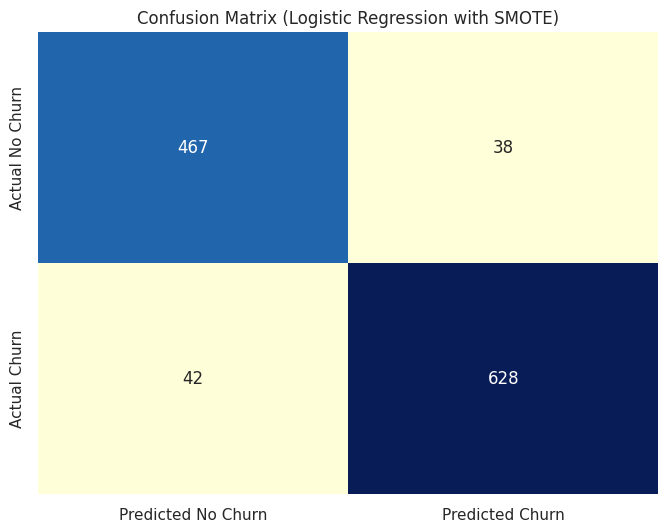

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_lr, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Logistic Regression with SMOTE)')
plt.show()

# ***DECISION TREE CLASSIFIER***

## ***Model Training***

In [87]:
# Initialize the model
model_dt_smote = DecisionTreeClassifier(criterion="gini",
                                        random_state=100,
                                        max_depth=6,
                                        min_samples_leaf=8)

# Train the model
model_dt_smote.fit(xr_train,yr_train)

# Make predictions on the test set
Y_pred_dt_smote = model_dt_smote.predict(xr_test)

## ***Model Evaluation***

### ***Accuracy Score***

In [88]:
# Evaluate accuracy
accuracy_dt = accuracy_score(yr_test, Y_pred_dt_smote)
print(f'Accuracy on Decision Tree Classifier: {accuracy_dt:.4f}')

Accuracy on Decision Tree Classifier: 0.9328


### ***Classification Report***

In [89]:
# Classification Report
class_report_dt_smote = classification_report(yr_test, Y_pred_dt_smote)
print('Classification Report (Decision Tree Classifier):\n', class_report_dt_smote)

Classification Report (Decision Tree Classifier):
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       505
           1       0.95      0.93      0.94       670

    accuracy                           0.93      1175
   macro avg       0.93      0.93      0.93      1175
weighted avg       0.93      0.93      0.93      1175



### ***Confusion Matrix***

In [90]:
# Confusion Matrix
conf_matrix_dt_smote = confusion_matrix(yr_test, Y_pred_dt_smote)
conf_matrix_df_dt_smote = pd.DataFrame(conf_matrix_dt_smote, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Decision Tree Classifier):\n', conf_matrix_df_dt_smote)

Confusion Matrix (Decision Tree Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 473               32
Actual Churn                     47              623


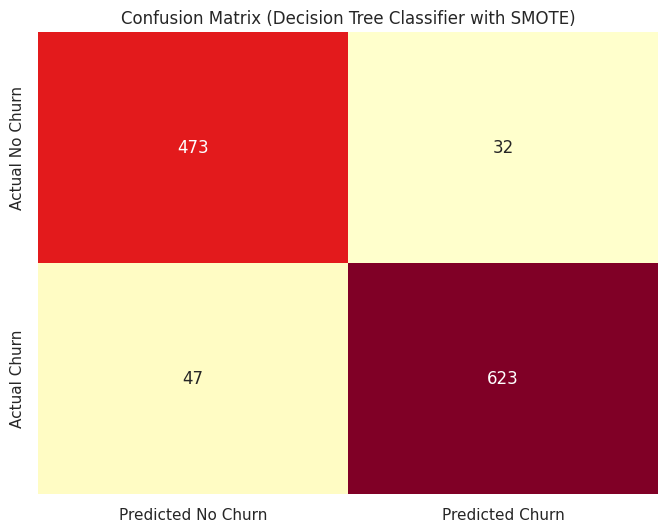

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_dt_smote, annot=True, fmt='d', cmap='YlOrRd', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Decision Tree Classifier with SMOTE)')
plt.show()

# ***GRADIENT BOOSTING CLASSIFER***

## ***Model Training***

In [92]:
# Initialize the Gradient Boosting Classifier model
gb_model_smote = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model_smote.fit(xr_train, yr_train)

# Make predictions on the test set
Y_pred_gb_smote = gb_model.predict(xr_test)

## ***Model: Evaluation***

### ***Accuracy Score***

In [93]:
# Evaluate accuracy
accuracy_gb = accuracy_score(yr_test, Y_pred_gb_smote)
print(f'Accuracy on Gradient Boosting Classifier: {accuracy_gb:.4f}')

Accuracy on Gradient Boosting Classifier: 0.7557


### ***Classification report***

In [94]:
# Generate and display the classification report
class_report_gb_smote = classification_report(yr_test, Y_pred_gb_smote)
print('Classification Report (Gradient Boosting Classifier):\n', class_report_gb_smote)

Classification Report (Gradient Boosting Classifier):
               precision    recall  f1-score   support

           0       0.64      0.98      0.78       505
           1       0.98      0.58      0.73       670

    accuracy                           0.76      1175
   macro avg       0.81      0.78      0.75      1175
weighted avg       0.83      0.76      0.75      1175



### ***Confusion matrix***

In [95]:
# Generate and display the confusion matrix
conf_matrix_gb = confusion_matrix(yr_test, Y_pred_gb_smote)
conf_matrix_df_gb_smote = pd.DataFrame(conf_matrix_gb, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Gradient Boosting Classifier):\n', conf_matrix_df_gb_smote)

Confusion Matrix (Gradient Boosting Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 497                8
Actual Churn                    279              391


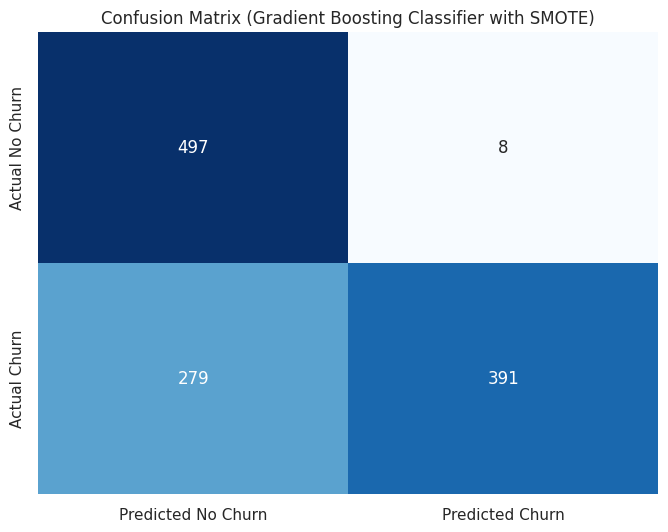

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_gb_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Gradient Boosting Classifier with SMOTE)')
plt.show()

# ***RANDOM FOREST CLASSIFIER***

## ***Model Training***

In [97]:
# Initialize the Random Forest model
rf_model_smote = RandomForestClassifier(n_estimators=100,
                                  criterion='gini',
                                  random_state = 100,
                                  max_depth=6,
                                  min_samples_leaf=8)

# Train the model
rf_model_smote.fit(xr_train,yr_train)

# Make predictions on the test set
Y_pred_rf_smote = rf_model_smote.predict(xr_test)

## ***Model Evaluation***

### ***Accuracy Score***

In [98]:
# Evaluate accuracy
accuracy = accuracy_score(yr_test, Y_pred_rf_smote)
print(f'Accuracy on Random Forest Classifier: {accuracy:.4f}')

Accuracy on Random Forest Classifier: 0.9421


### ***Classification report***

In [99]:
# Generate and display the classification report
class_report = classification_report(yr_test, Y_pred_rf_smote)
print('Classification Report (Random Forest Classifier):\n', class_report)

Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       505
           1       0.94      0.96      0.95       670

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175



### ***Confusion matrix***

In [100]:
# Generate and display the confusion matrix
conf_matrix_rf = confusion_matrix(yr_test, Y_pred_rf_smote)
conf_matrix_rf_smote = pd.DataFrame(conf_matrix_rf, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
print('Confusion Matrix (Random Forest Classifier):\n', conf_matrix_rf_smote)

Confusion Matrix (Random Forest Classifier):
                  Predicted No Churn  Predicted Churn
Actual No Churn                 463               42
Actual Churn                     26              644


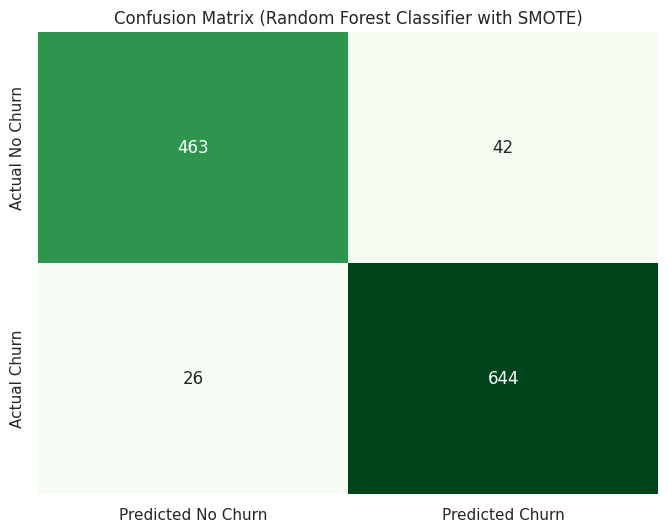

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Random Forest Classifier with SMOTE)')
plt.show()

# ***NEURAL NETWORK MODEL***

## ***Model Training***

In [102]:
# Build a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=xr_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(xr_train, yr_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/50
118/118 [==============================] - 2s 5ms/step - loss: 3.8879 - accuracy: 0.7157 - val_loss: 1.0867 - val_accuracy: 0.8277
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.8440 - val_loss: 1.5315 - val_accuracy: 0.8287
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 1.5186 - accuracy: 0.8219 - val_loss: 0.8982 - val_accuracy: 0.8766
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 1.0714 - accuracy: 0.8698 - val_loss: 0.9682 - val_accuracy: 0.7691
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.7440 - accuracy: 0.8717 - val_loss: 0.8813 - val_accuracy: 0.8819
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9809 - accuracy: 0.8722 - val_loss: 0.3620 - val_accuracy: 0.8883
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9580 - accuracy: 0.8813 - val_loss: 0.3089 - val_accuracy: 0.9096
Epoch 

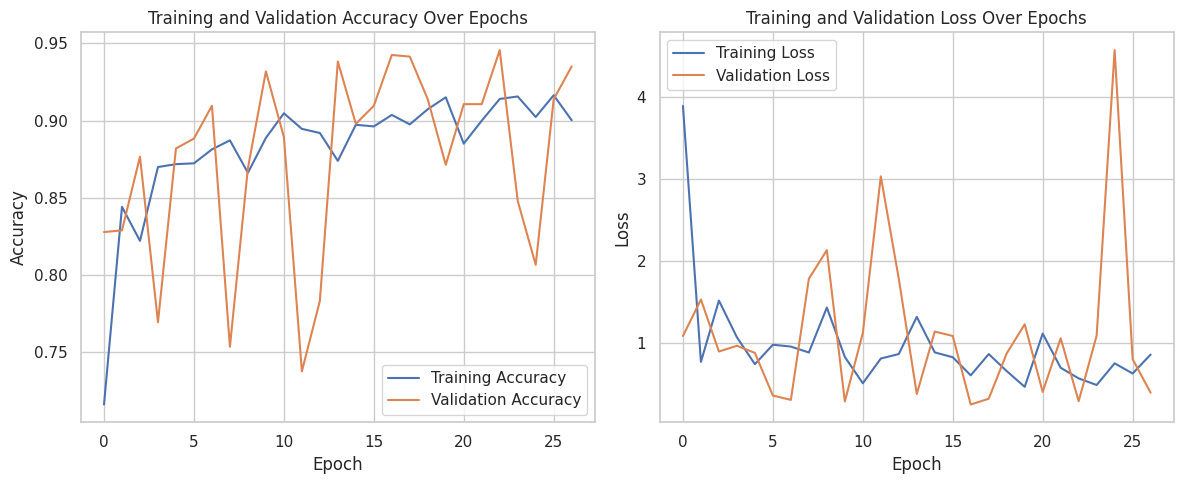

In [105]:
# Plot training and validation accuracy values
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
# Make predictions on the test set
Y_pred_nn = (model.predict(xr_test) > 0.5).astype(int)

37/37 [==============================] - 0s 2ms/step


**This part converts the raw probabilities into binary predictions. If the probability is greater than 0.5, it is considered as class 1 (churn), and if it's less than or equal to 0.5, it is considered as class 0 (no churn). This threshold of 0.5 is a common choice in binary classification problems.**

## ***Model Evaluation***

### ***Accuracy***

In [107]:
accuracy_nn = accuracy_score(yr_test, Y_pred_nn)
print(f'Accuracy (Neural Network): {accuracy_nn:.4f}')

Accuracy (Neural Network): 0.9328


### ***Classification report***

In [108]:
classification_report_nn = classification_report(yr_test, Y_pred_nn)
print('Classification Report (Neural Network):\n', classification_report_nn)

Classification Report (Neural Network):
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       505
           1       0.94      0.94      0.94       670

    accuracy                           0.93      1175
   macro avg       0.93      0.93      0.93      1175
weighted avg       0.93      0.93      0.93      1175



### ***Confusion Matrix***

In [109]:
confusion_matrix_nn = confusion_matrix(yr_test, Y_pred_nn)

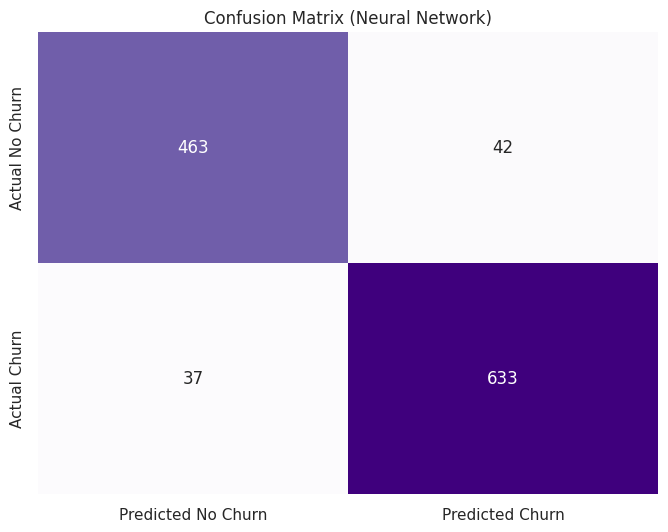

In [110]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nn, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (Neural Network)')
plt.show()

# ***LSTM MODEL***

## ***Model Training***

In [111]:
# Build and train LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(xr_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [112]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [120]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(xr_train, yr_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/50
118/118 [==============================] - 3s 23ms/step - loss: 0.1448 - accuracy: 0.9398 - val_loss: 0.1931 - val_accuracy: 0.9191
Epoch 2/50
118/118 [==============================] - 3s 22ms/step - loss: 0.1652 - accuracy: 0.9372 - val_loss: 0.2047 - val_accuracy: 0.9170
Epoch 3/50
118/118 [==============================] - 3s 25ms/step - loss: 0.1562 - accuracy: 0.9388 - val_loss: 0.1442 - val_accuracy: 0.9489
Epoch 4/50
118/118 [==============================] - 3s 29ms/step - loss: 0.1468 - accuracy: 0.9428 - val_loss: 0.1299 - val_accuracy: 0.9553
Epoch 5/50
118/118 [==============================] - 3s 23ms/step - loss: 0.1444 - accuracy: 0.9452 - val_loss: 0.1371 - val_accuracy: 0.9489
Epoch 6/50
118/118 [==============================] - 3s 23ms/step - loss: 0.1615 - accuracy: 0.9364 - val_loss: 0.1492 - val_accuracy: 0.9553
Epoch 7/50
118/118 [==============================] - 3s 23ms/step - loss: 0.1503 - accuracy: 0.9409 - val_loss: 0.1460 - val_accuracy: 0.9489

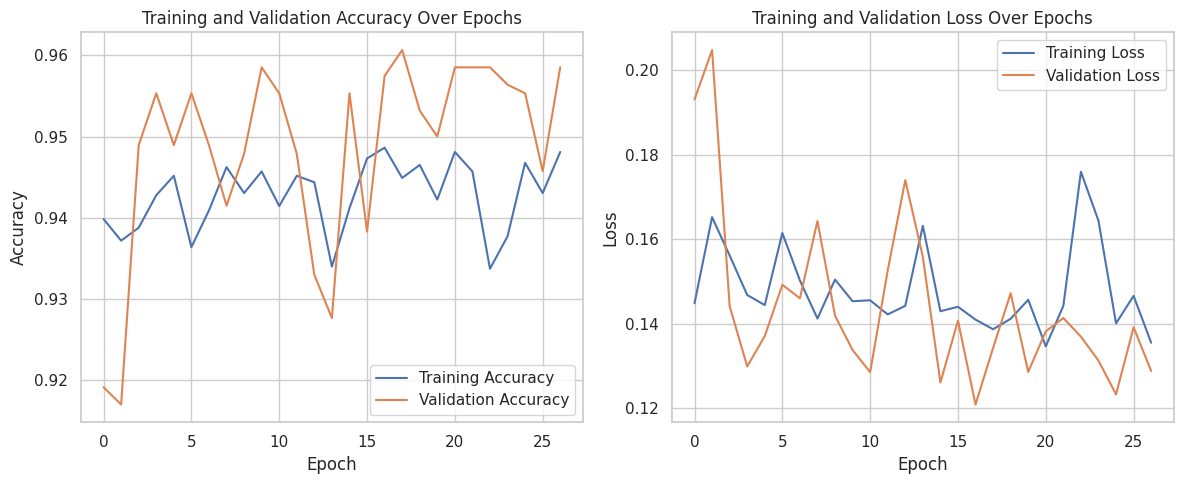

In [121]:
# Visualize training history
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [122]:
# Make predictions on the test set
Y_pred_lstm = (model.predict(xr_test) > 0.5).astype(int)

37/37 [==============================] - 0s 8ms/step


**Y_pred_lstm is a binary array representing the predicted churn labels for the instances in the test set based on the LSTM model.**

## ***Model Evaluation***

### ***Accuracy***

In [123]:
accuracy_lstm = accuracy_score(yr_test, Y_pred_lstm)
print(f'Accuracy (LSTM): {accuracy_lstm:.4f}')

Accuracy (LSTM): 0.9430


### ***Classification report***

In [124]:
classification_report_lstm = classification_report(yr_test, Y_pred_lstm)
print('Classification Report (LSTM):\n', classification_report_lstm)

Classification Report (LSTM):
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       505
           1       0.95      0.95      0.95       670

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175



### ***Confusion Matrix***

In [125]:
confusion_matrix_lstm = confusion_matrix(yr_test, Y_pred_lstm)

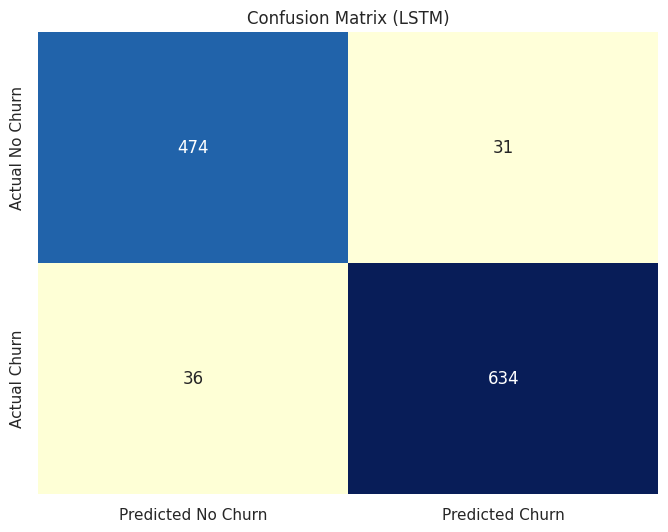

In [126]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_lstm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix (LSTM)')
plt.show()